In [1]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 1s (70.0 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import IPython.display as ipd
ipd.Audio('/content/drive/MyDrive/colab/RADAR/fast_walking.wav')# load a local WAV file

115.05138025664965


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


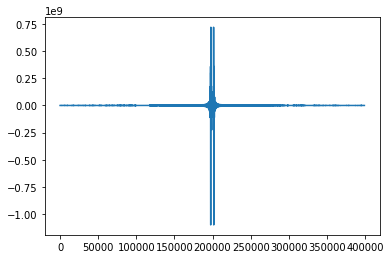

In [31]:
import numpy as np
import threading
import matplotlib.pyplot as plt
import time
from timeit import default_timer as timer
import soundfile as sf
import sys
import scipy.io as sio
import scipy.io.wavfile

ns=1996
pvals = np.zeros(ns)
dphase = 0

# Read
samplerate, x0 = sio.wavfile.read('/content/drive/MyDrive/colab/RADAR/breath.wav')

# DSP
X0 = np.fft.fftshift(np.fft.fft(x0))
S0 = 10 * np.log(np.abs(X0) / np.sqrt(ns))
k = np.argmax(S0)

dphase = 180 / np.pi * np.angle(X0[k])

pvals = np.concatenate((dphase, pvals[0:ns-1]), axis=None)
print(max(pvals))

plt.plot(X0)


In [36]:
import numpy as np
import threading
import matplotlib.pyplot as plt
import time
from timeit import default_timer as timer
import soundfile as sf
import sys
import scipy.io as sio
import scipy.io.wavfile

ns=len(x0)
pvals = np.zeros(ns)
dphase = 0
pvals_list=np.zeros(len(x0))
# Read
samplerate, x0 = sio.wavfile.read('/content/drive/MyDrive/colab/RADAR/non-breath.wav')
loop_index=0

while (loop_index < len(x0)):
    # DSP
    X0 = np.fft.fftshift(np.fft.fft(x0))
    S0 = 10 * np.log(np.abs(X0) / np.sqrt(ns))
    k = np.argmax(S0)

    dphase = 180 / np.pi * np.angle(X0[k])

    pvals = np.concatenate((dphase, pvals[0:ns-1]), axis=None)
    pvals= (max(pvals))
    pvals_list = np.concatenate((pvals, pvals_list[0:ns-1]), axis=None)

    loop_index=+1

plt.plot(pvals_list)





IndexError: ignored

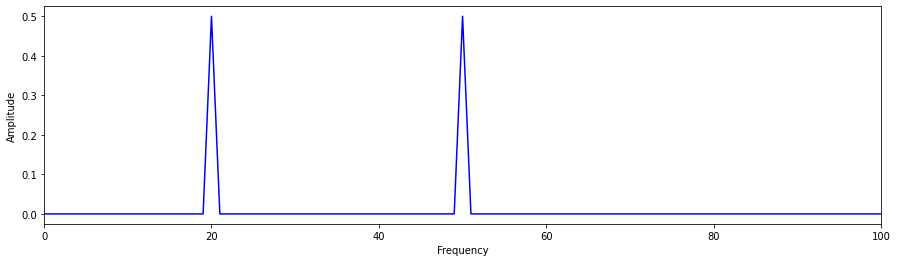

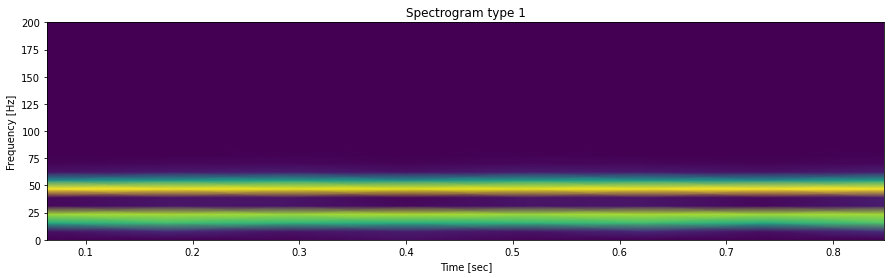

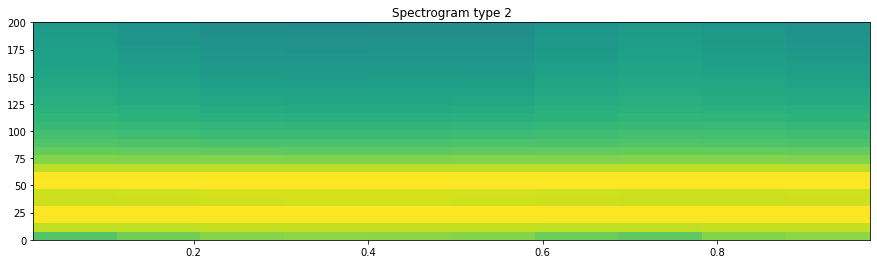

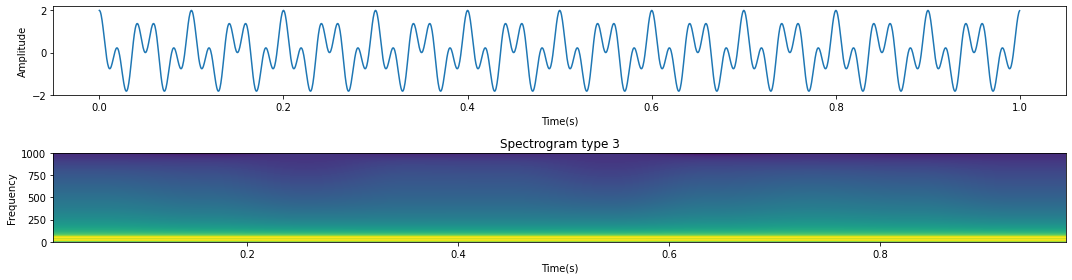

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2000
  n_fft, y.shape[-1]


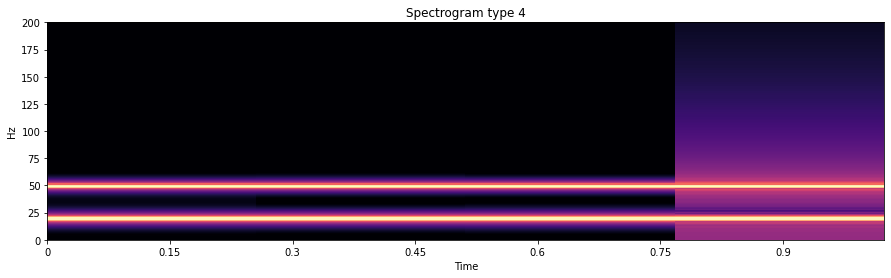

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Fs = 2000.
Ts = 1 / Fs
te = 1.0
t = np.arange(0.0, te, Ts)

# Signal x (20Hz) + Signal y (50Hz)
x = np.cos(2 * np.pi * 20 * t)
y = np.cos(2 * np.pi * 50 * t)

# Signal z
z = x + y

N = len(z)

k = np.arange(N)
T = N / Fs
freq = k / T
freq = freq[range(int(N/2))]

# FFT 적용
yfft = np.fft.fft(z)
yf = yfft / N
yf = yf[range(int(N/2))]

plt.rcParams["figure.figsize"] = (15,4)

# FFT 출력
plt.plot(freq, abs(yf), 'b')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, Fs / 20)
plt.show()

import pylab 
from scipy import signal


## Spectrogram type 1
f, tt, Sxx = signal.spectrogram(z, Fs)

plt.pcolormesh(tt, f, Sxx, shading='gouraud')
plt.title('Spectrogram type 1')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 200)
plt.show()
    
## Spectrogram type 2
pp, ff, tt, pplot = pylab.specgram(
z,
NFFT=256,
Fs=2000,
detrend=pylab.detrend_none, 
window=pylab.window_hanning,
noverlap=int(128 * 0.5))
pylab.title('Spectrogram type 2')
pylab.ylim(0, 200)


## Spectrogram type 3
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.plot(t, z)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Amplitude')
fig.tight_layout()

Pxx, freqs, bins, im = ax2.specgram(z, NFFT=256, Fs=Fs, noverlap=int(128 * 0.5))
ax2.set_title('Spectrogram type 3')
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Frequency')
fig.tight_layout()

plt.show()

import librosa.display

# STFT power spectrum
D_octave = np.abs(librosa.stft(z))
librosa.display.specshow(librosa.amplitude_to_db(D_octave, ref=np.max), sr=Fs, y_axis='linear', x_axis='time')
plt.title('Spectrogram type 4')
plt.ylim(0, 200)
plt.show()

sampling rate:  48000
sampling rate2:  48000
time :  0.083125
1996
time :  0.41583333333333333


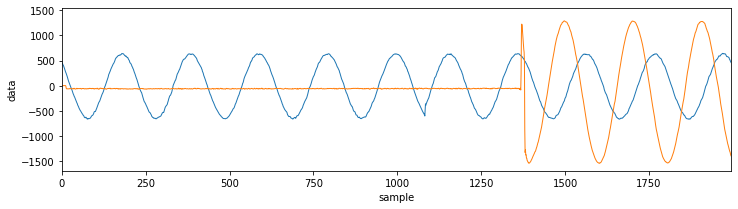

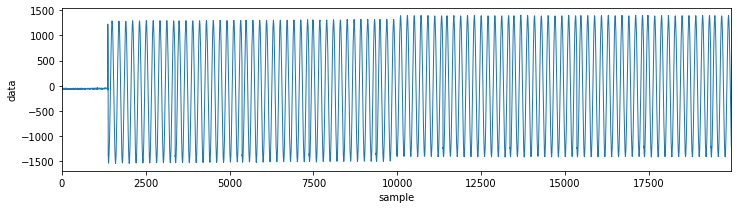

In [17]:
from ctypes import sizeof
import numpy as np
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt

# 3-가
#samplerate, data = sio.wavfile.read('/content/drive/MyDrive/colab/RADAR/test_file.wav')
samplerate, data = sio.wavfile.read('/content/drive/MyDrive/colab/RADAR/x0.wav')
samplerate2, data2 = sio.wavfile.read('/content/drive/MyDrive/colab/RADAR/x04.wav')

times = np.arange(len(data))/float(samplerate)
times=times*2
times2 = np.arange(len(data2))/float(samplerate2)

plt.figure(figsize = (12, 3))
plt.plot(data, lw = 1)
plt.plot(data2, lw = 1)
plt.xlabel("sample")
plt.ylabel("data")
plt.xlim(0, len(data))

plt.figure(figsize = (12, 3))
plt.plot(data2, lw = 1)
plt.xlabel("sample")
plt.ylabel("data")
plt.xlim(0, len(data2))

# 3-나
# Sample rate (샘플레이트)
# 이는 샘플의 빈도 수 입니다.
# 즉, 1초당 추출되는 샘플 개수라고 할 수 있습니다.
# 오디오에서 44.1KHz(44100Hz), 22KHz(22050Hz)를 뜻합니다.
# 괄호안에 값은 좀더 정확하게 표현한 값입니다.
print( 'sampling rate: ', samplerate)
print( 'sampling rate2: ', samplerate2)

# 3-다 
# 따라서 데이터 전체의 개수에서 sample rate를 나누어 주면됩니다.
print ('time : ', times[-1])
print(np.size(times))
print ('time : ', times2[-1])



399201
48000


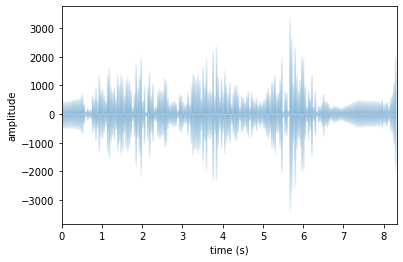

sampling rate:  48000
time :  8.316666666666666


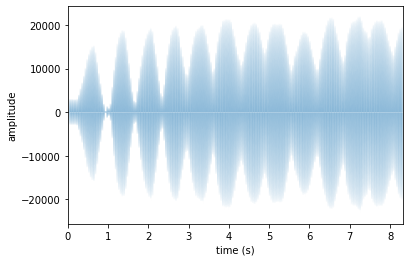

sampling rate:  48000
time :  8.316666666666666


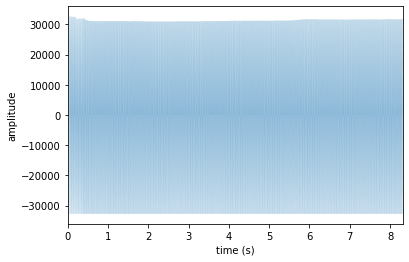

sampling rate:  48000
time :  8.316666666666666


In [3]:
import numpy as np
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt

import sounddevice as sd

# 3-가
samplerate, data = sio.wavfile.read('/content/drive/MyDrive/colab/RADAR/walking.wav')
times = np.arange(len(data))/float(samplerate) #데이터 전체의 개수에서 sample rate를 나누어 주면됩니다. 399201/48000
#times=times*2
#sd.play(data, samplerate) #연결된 devide가 없어서 주석처리
print(len(data))
print(samplerate)
plt.fill_between(times, data)
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

# 3-나
# Sample rate (샘플레이트)
# 이는 샘플의 빈도 수 입니다.
# 즉, 1초당 추출되는 샘플 개수라고 할 수 있습니다.
# 오디오에서 44.1KHz(44100Hz), 22KHz(22050Hz)를 뜻합니다.
print( 'sampling rate: ', samplerate)

# 3-다 
# 시간은 데이터 전체의 개수에서 sample rate를 나누어 주면됩니다.
print ('time : ', times[-1])

#====
samplerate2, data2 = sio.wavfile.read('/content/drive/MyDrive/colab/RADAR/breath.wav')
times2 = np.arange(len(data2))/float(samplerate2)
plt.fill_between(times2, data2)
plt.xlim(times2[0], times2[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()
print( 'sampling rate: ', samplerate2)
print ('time : ', times2[-1])

samplerate3, data3 = sio.wavfile.read('/content/drive/MyDrive/colab/RADAR/non-breath.wav')
times3 = np.arange(len(data3))/float(samplerate3)
plt.fill_between(times3, data3)
plt.xlim(times3[0], times3[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()
print( 'sampling rate: ', samplerate3)
print ('time : ', times3[-1])

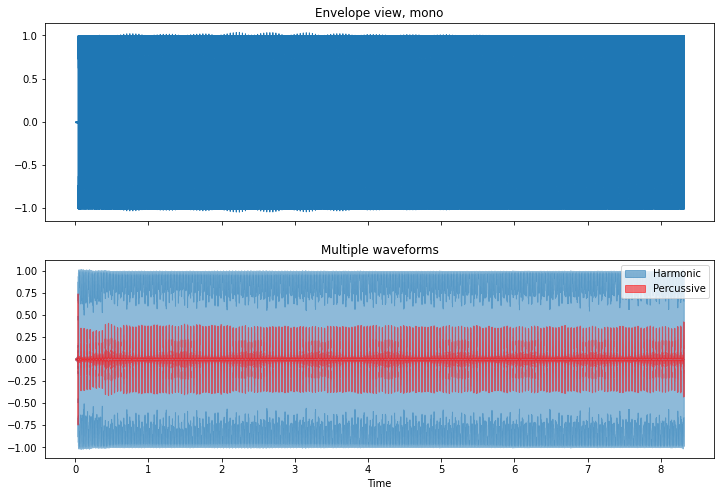

In [6]:
#a monophonic waveform with an envelope view
import matplotlib.pyplot as plt
y, sr = librosa.load('/content/drive/MyDrive/colab/RADAR/non-breath.wav')
fig, ax = plt.subplots(nrows=2, sharex=True, figsize = (12, 8))

librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

#harmonic and percussive components with transparency
y, sr = librosa.load('/content/drive/MyDrive/colab/RADAR/non-breath.wav')
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[1], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[1], label='Percussive')
ax[1].set(title='Multiple waveforms')
ax[1].legend()


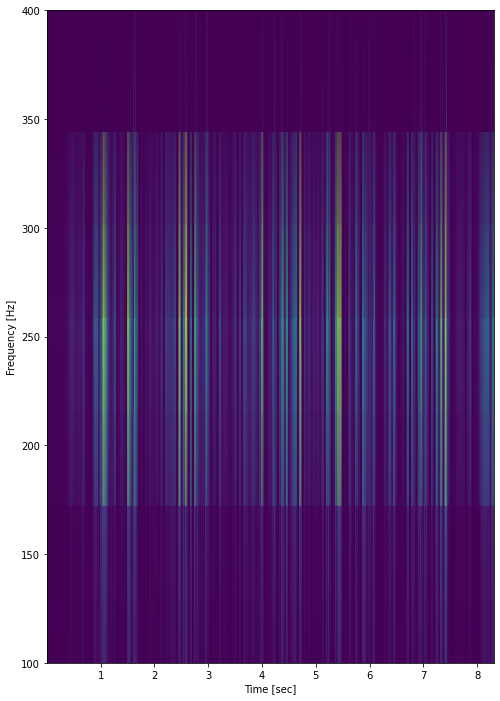

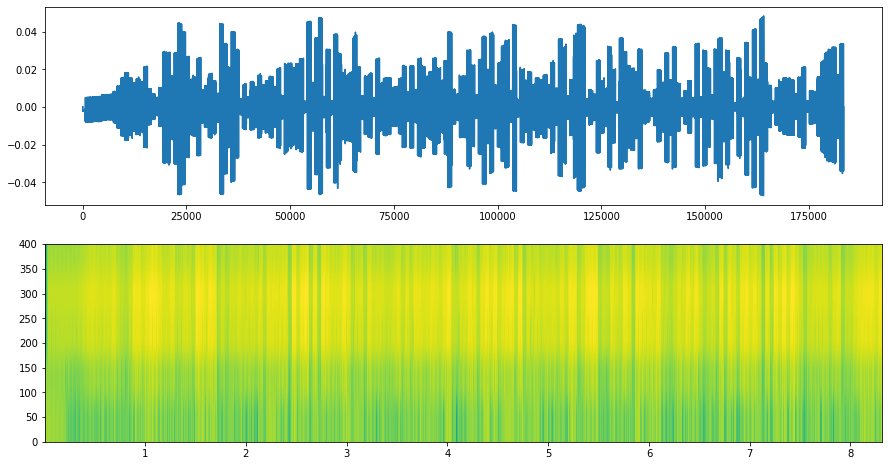

In [ ]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import librosa
x, fs = librosa.load('/content/drive/MyDrive/colab/RADAR/fast_walking.wav')

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.ylim(100,400)
plt.xlabel('Time [sec]')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,8))
ax1.plot(x)
Pxx, freqs, bins, im = ax2.specgram(x, Fs=fs) 
plt.ylim(0,400)
plt.show()

183383
(183383,)
22050


(0.0, 1000.0)

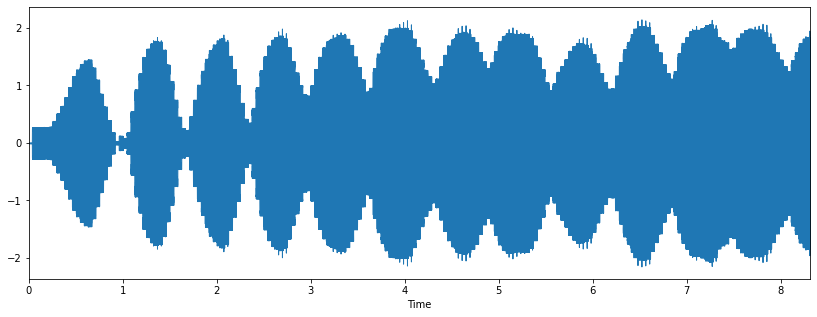

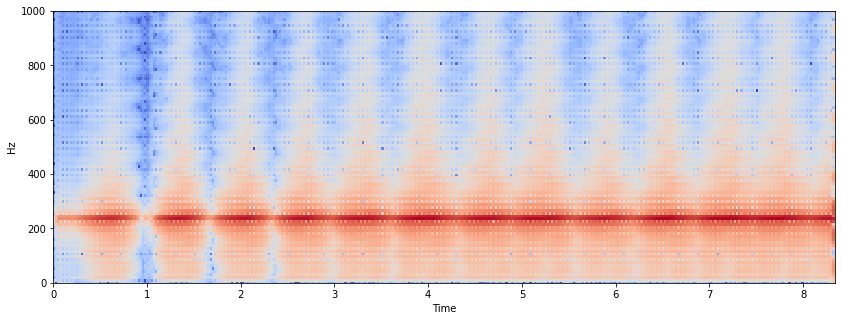

In [4]:
#Zooming in on a plot to show raw sample values#Waveform 시각화

import librosa
x, sr = librosa.load('/content/drive/MyDrive/colab/RADAR/breath.wav')
x=x*3
#the length of the audio array and sample rate:
print(len(x))
print(x.shape)
print(sr)

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#Display a spectrogram using librosa.display.specshow:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.ylim(0,1000)

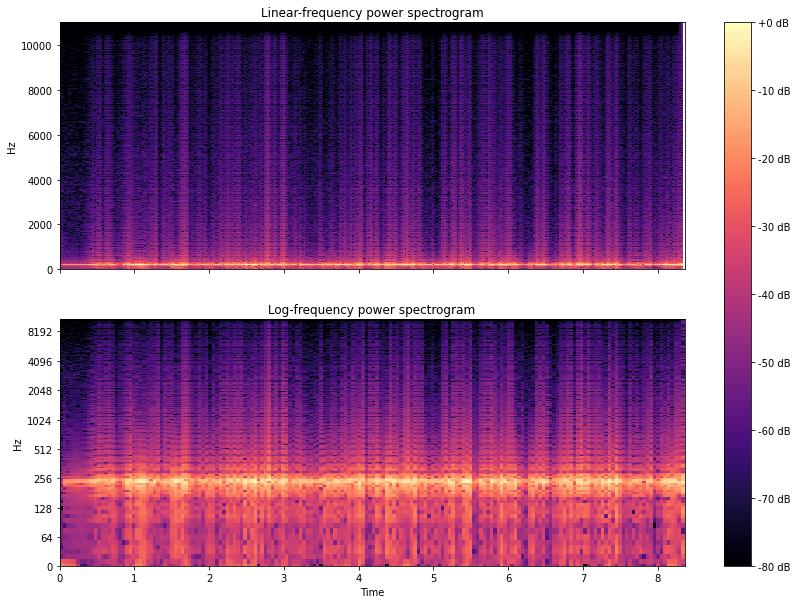

In [ ]:
import matplotlib.pyplot as plt
# walking fast_walking fast_moving_target
y, sr = librosa.load('/content/drive/MyDrive/colab/RADAR/fast_walking.wav') 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(14, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

183383
(183383,)
22050


Text(0.5, 1.0, 'Power spectrum')

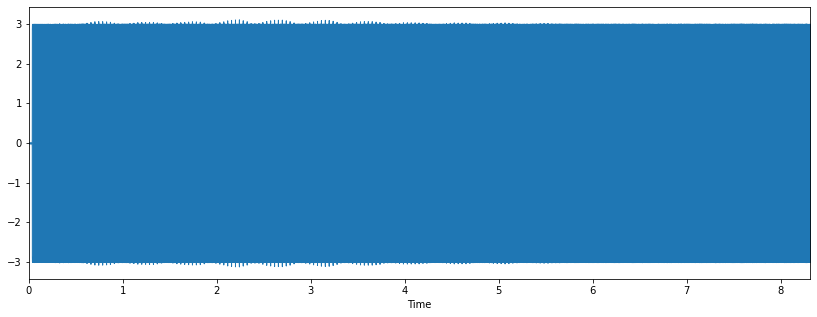

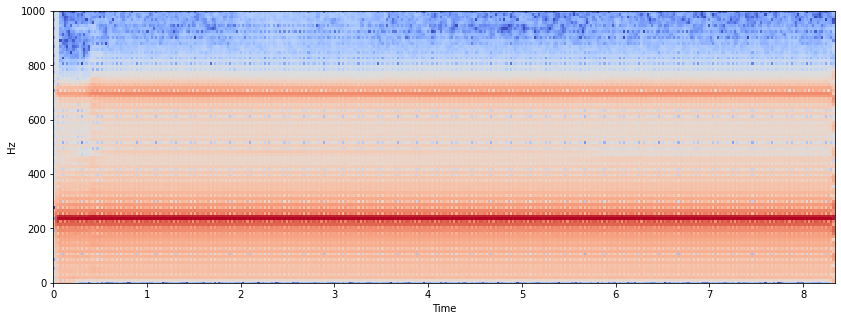

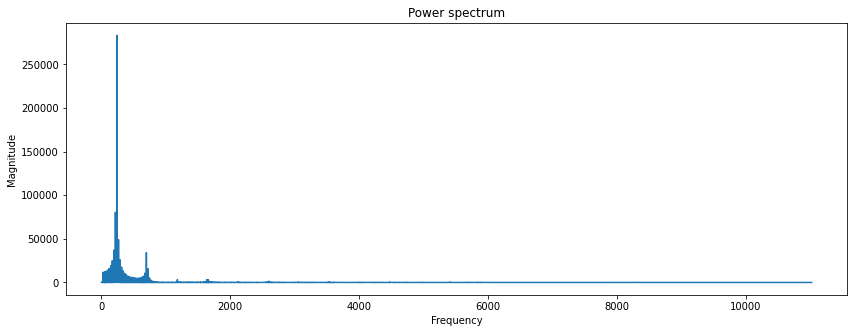

In [19]:
#Zooming in on a plot to show raw sample values#Waveform 시각화

import librosa
x, sr = librosa.load('/content/drive/MyDrive/colab/RADAR/non-breath.wav')
x=x*3
#the length of the audio array and sample rate:
print(len(x))
print(x.shape)
print(sr)

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#Display a spectrogram using librosa.display.specshow:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.ylim(0,1000)

#단순 푸리에 변환 → Spectrum

#푸리에 변환 결과는 복소공간에 형성되어 실수부와 허수부로 나뉘게 된다. 
#이 값을 절댓값을 취해 magnitude로 사용한다. Frequency는 초당 주기의 반복 빈도 수 이므로, 초당 샘플갯수인 sr보다 클 수 없다. 
#따라서 0 ~ frequency 사이에서 len(magnitude) 만큼 frequency domain을 만들어 주자.

fft = np.fft.fft(x)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(14, 5))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")


Text(0.5, 1.0, 'Spectrogram (dB)')

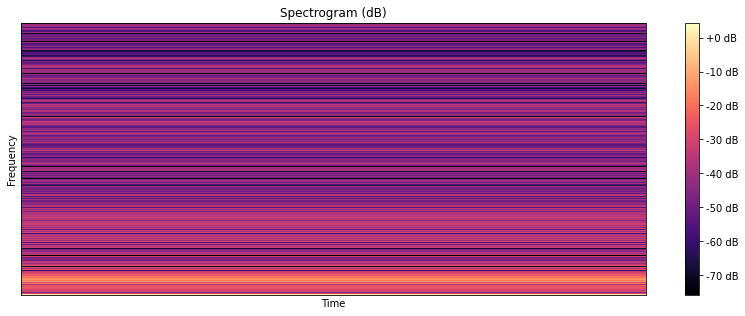

In [ ]:
#STFT → Spectrogram

#STFT는 단순 푸리에 변환과 다르게 시간 정보를 보존하기 위해, frame 단위로 FFT를 수행한다. 
#따라서 frame 수와 frame 당 sample 수를 지정해주어야 한다. 
#또한 Spectrogram에서는 dB 값을 사용하므로, 푸리에 변환의 결과인 magnitude에 로그 Scaling을 통해 dB로 변환해준다.

hop_length = 1996*100  # 전체 frame 수
n_fft = 1996  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.ylim(0,400)
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

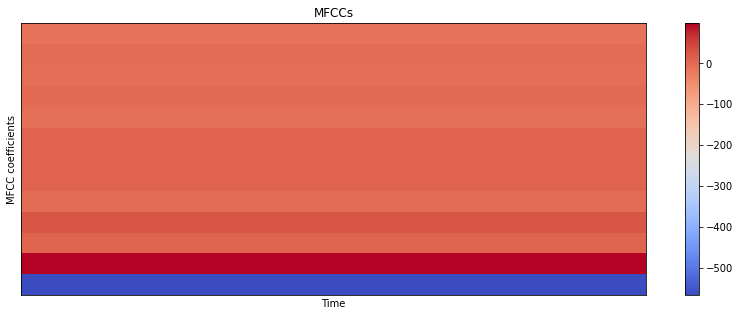

In [ ]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(x, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=(14, 5))
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

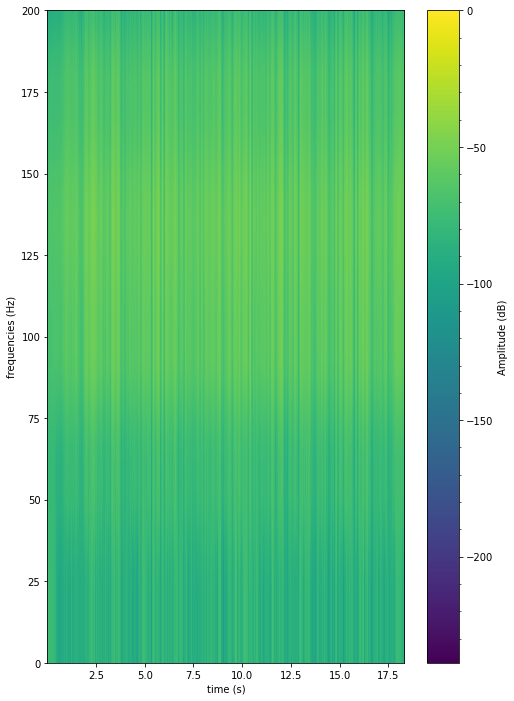

In [ ]:
import numpy as np
from scipy import signal 
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from matplotlib import mlab
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [8, 12]
fs = 10e3

def specgram2d(y, srate=44100, ax=None, title=None):
  if not ax:
    ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True)
  spec, freqs, t, im = ax.specgram(y, Fs=fs, scale='dB', vmax=0)
  ax.set_xlabel('time (s)')
  ax.set_ylabel('frequencies (Hz)')
  ax.set_ylim(0,200)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label('Amplitude (dB)')
  cbar.minorticks_on()
  return spec, freqs, t, im

fig1, ax1 = plt.subplots()
specgram2d(x)
plt.show()



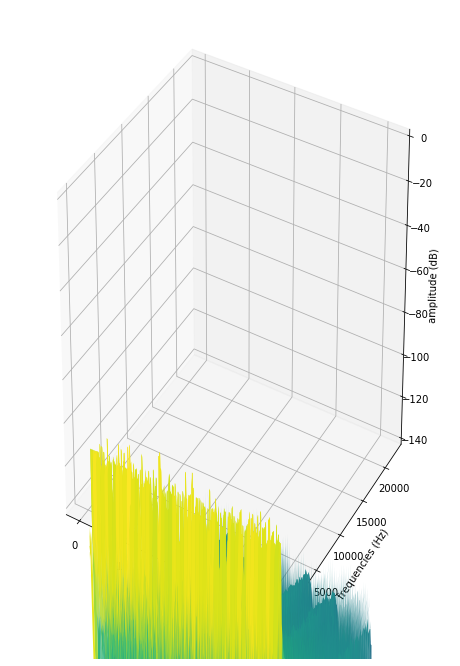

In [ ]:
def specgram3d(y, srate=44100, ax=None, title=None):
  if not ax:
    ax = plt.axes(projection='3d')
  ax.set_title(title, loc='center', wrap=True)
  spec, freqs, t = mlab.specgram(y, Fs=srate)
  X, Y, Z = t[None, :], freqs[:, None],  20.0 * np.log10(spec)
  ax.plot_surface(X, Y, Z, cmap='viridis')
  ax.set_xlabel('time (s)')
  ax.set_ylabel('frequencies (Hz)')
  ax.set_zlabel('amplitude (dB)')
  ax.set_zlim(-140, 0)
  return X, Y, Z

fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
specgram3d(x)  
plt.show()
